In [1]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style for better visuals
sns.set(style='whitegrid')

# Load the dataset
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

In [2]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()

# Display the first 5 rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

In [3]:
# Convert 'TotalCharges' to a numeric type, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values that were created during coercion
df.dropna(inplace=True)

# Verify the change
print("Data types after cleaning 'TotalCharges':")
df.info()

Data types after cleaning 'TotalCharges':
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  Paper

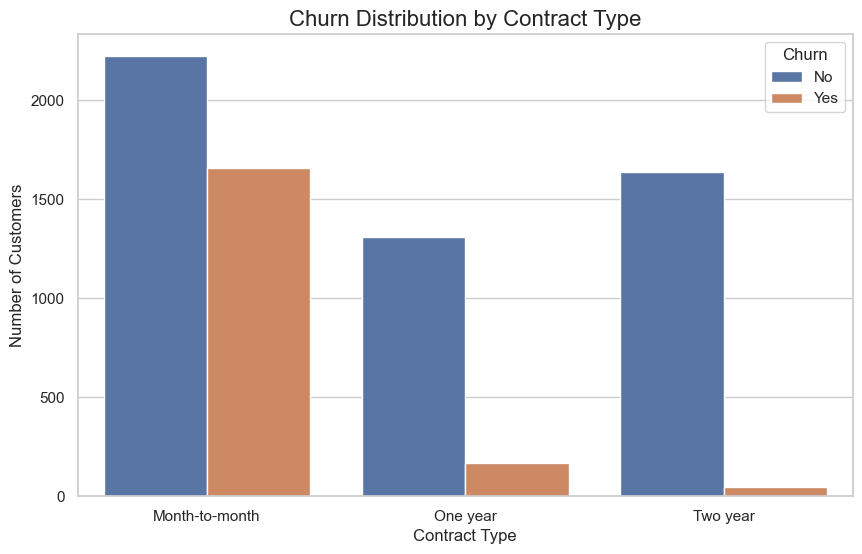

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Distribution by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn')

# --- IMPORTANT: Save the figure ---
plt.savefig('churn_by_contract.png')

plt.show()

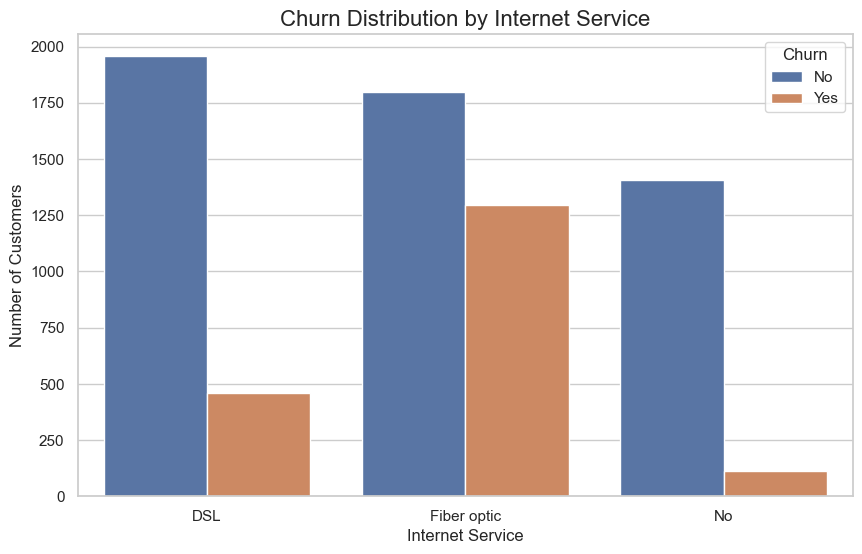

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn Distribution by Internet Service', fontsize=16)
plt.xlabel('Internet Service', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn')

# --- IMPORTANT: Save the figure ---
plt.savefig('churn_by_internetservice.png')

plt.show()

In [6]:
# Drop the customerID column as it is not a predictive feature
df.drop('customerID', axis=1, inplace=True)

# Convert all categorical variables into dummy/indicator variables (one-hot encoding)
# This will handle all columns with text data automatically
X = pd.get_dummies(df, drop_first=True)

# The 'Churn_Yes' column is our target variable (what we want to predict)
# We separate it from the features
y = X.pop('Churn_Yes')

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
from sklearn.preprocessing import StandardScaler

# First, check the actual column names in your DataFrame
print("Available columns:", X_train.columns.tolist())

# After seeing the output above, replace this line with your actual numerical column names
# For example, if your DataFrame shows columns like 'feature1', 'feature2', 'feature3':
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
# This will automatically select all numerical columns

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler ONLY on the training data and transform both train and test data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Alternatively, if you want to be more specific about which columns to scale:
# First check the output of the print statement above
# Then replace numerical_cols with the actual column names from your DataFrame
# numerical_cols = ['actual_column1', 'actual_column2', 'actual_column3']

Available columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize and train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate and print metrics
print("--- Logistic Regression Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_log):.4f}")

--- Logistic Regression Performance ---
Accuracy: 0.8053
Precision: 0.6515
Recall: 0.5749
F1-Score: 0.6108
AUC-ROC: 0.7318


In [12]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate and print metrics
print("\n--- XGBoost Classifier Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_xgb):.4f}")


--- XGBoost Classifier Performance ---
Accuracy: 0.7783
Precision: 0.5891
Recall: 0.5481
F1-Score: 0.5679
AUC-ROC: 0.7048


/Users/aayushjha/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:05:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


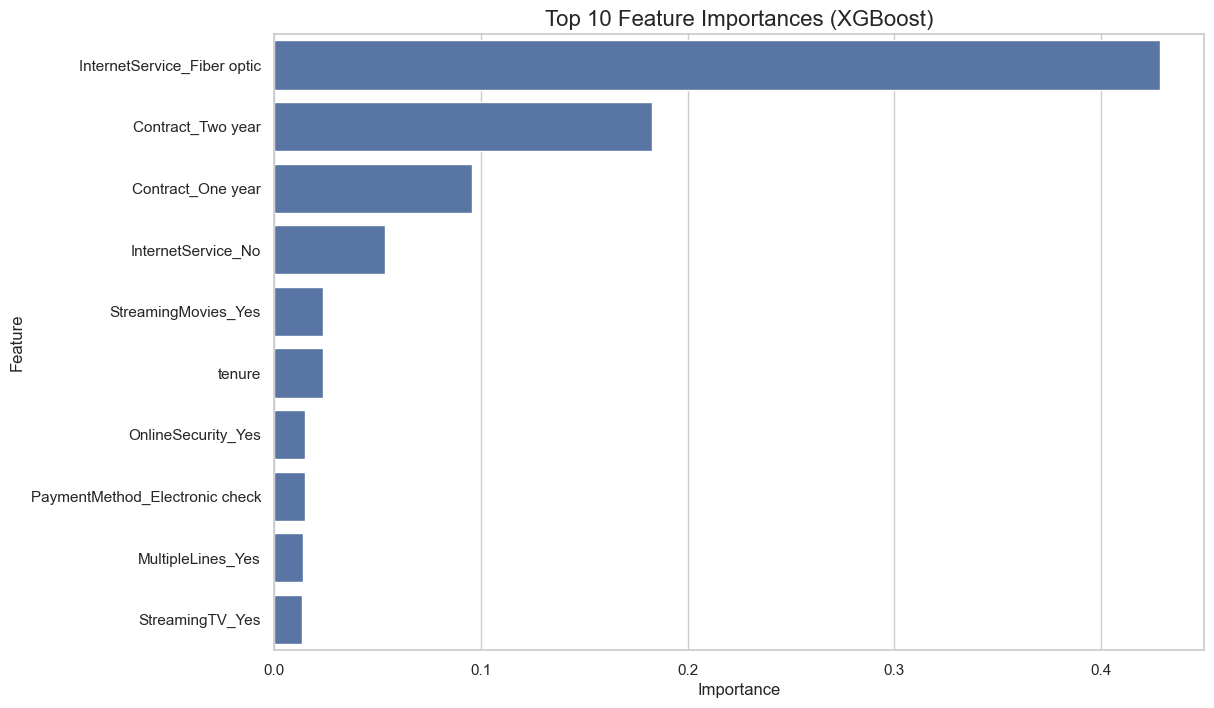

In [13]:
# Get feature importances from the trained XGBoost model
importances = xgb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot and save the top 10 features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances (XGBoost)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# --- IMPORTANT: Save the figure ---
plt.savefig('feature_importance.png')

plt.show()